<a href="https://www.kaggle.com/code/husnainbaidar/data-prediction-using-prophet?scriptVersionId=105760761" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Installing and importing required dependencies

## I used Google Colab please use that if you do not have a GPU that allow ML algo.

In [1]:
!pip install prophet

In [2]:
import pandas as pd
from prophet import Prophet

## Loading data

In [52]:
df = pd.read_csv("/content/drive/MyDrive/Data_Analyst_Case_Study_Data.csv")

In [53]:
df

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536
...,...,...,...
140,EW2,2021-11-04,1490
141,EW2,2021-11-05,1067
142,EW2,2021-11-06,1591
143,EW2,2021-11-07,1696


In [54]:
warehouse1= df.loc[df['warehouse'] == 'EW1']
warehouse2= df.loc[df['warehouse'] == 'EW2']

## **Warehoues EW1 Prediction**

In [55]:
warehouse1

,warehouse,date,total_orders
0,EW1,2021-08-10,455
1,EW1,2021-08-11,553
2,EW1,2021-08-12,569
3,EW1,2021-08-13,426
4,EW1,2021-08-14,536
...,...,...,...
85,EW1,2021-11-04,386
86,EW1,2021-11-05,375
87,EW1,2021-11-06,441
88,EW1,2021-11-07,421


In [56]:
warehouse1.dtypes

warehouse       object
date            object
total_orders     int64
dtype: object

Data preprocessing

In [57]:
warehouse1 ['date'] = pd.to_datetime(warehouse1 ['date'])
warehouse1.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  """Entry point for launching an IPython kernel.


warehouse               object
date            datetime64[ns]
total_orders             int64
dtype: object

In [58]:
warehouse1.drop('warehouse', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  errors=errors,


In [59]:
warehouse1

,date,total_orders
0,2021-08-10,455
1,2021-08-11,553
2,2021-08-12,569
3,2021-08-13,426
4,2021-08-14,536
...,...,...
85,2021-11-04,386
86,2021-11-05,375
87,2021-11-06,441
88,2021-11-07,421


In [60]:
warehouse1.columns = ['ds', 'y']
warehouse1.head()

,ds,y
0,2021-08-10,455
1,2021-08-11,553
2,2021-08-12,569
3,2021-08-13,426
4,2021-08-14,536


## **Training the time series model**

In [61]:
p = Prophet(interval_width=0.92, daily_seasonality=True)

In [62]:
model = p.fit(warehouse1)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [63]:
future = p.make_future_dataframe(periods=7, freq='D')
future

,ds
0,2021-08-10
1,2021-08-11
2,2021-08-12
3,2021-08-13
4,2021-08-14
...,...
92,2021-11-11
93,2021-11-12
94,2021-11-13
95,2021-11-14


## **Making predictions and evaluating performance**

In [64]:
forecast_prediction = p.predict(future)
forecast_prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
92,2021-11-11,-270.560727,-110.251818,802.738612,-270.562071,-270.559313,595.159115,595.159115,595.159115,600.776683,600.776683,600.776683,-5.617568,-5.617568,-5.617568,0.0,0.0,0.0,324.598388
93,2021-11-12,-273.868539,-144.176369,786.795568,-273.870609,-273.866239,570.333905,570.333905,570.333905,600.776683,600.776683,600.776683,-30.442778,-30.442778,-30.442778,0.0,0.0,0.0,296.465366
94,2021-11-13,-277.176351,-125.032070,814.782219,-277.179285,-277.173030,644.819827,644.819827,644.819827,600.776683,600.776683,600.776683,44.043144,44.043144,44.043144,0.0,0.0,0.0,367.643475
95,2021-11-14,-280.484164,-101.678692,827.470338,-280.488085,-280.479805,652.198325,652.198325,652.198325,600.776683,600.776683,600.776683,51.421642,51.421642,51.421642,0.0,0.0,0.0,371.714162
96,2021-11-15,-283.791976,-129.721402,781.637858,-283.796958,-283.786458,597.246815,597.246815,597.246815,600.776683,600.776683,600.776683,-3.529868,-3.529868,-3.529868,0.0,0.0,0.0,313.454839


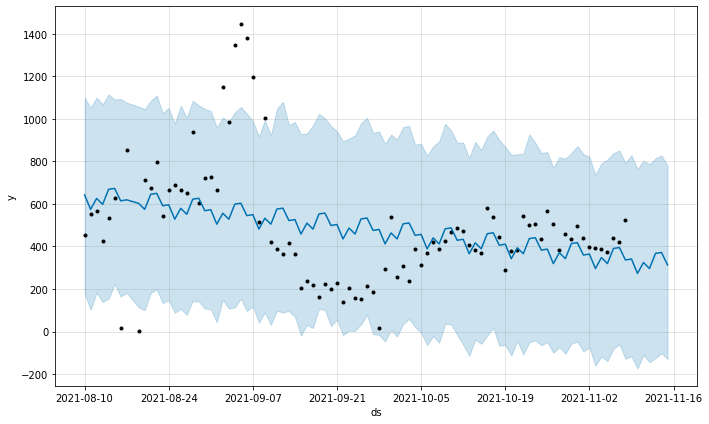

In [65]:
plot1 = p.plot(forecast_prediction)

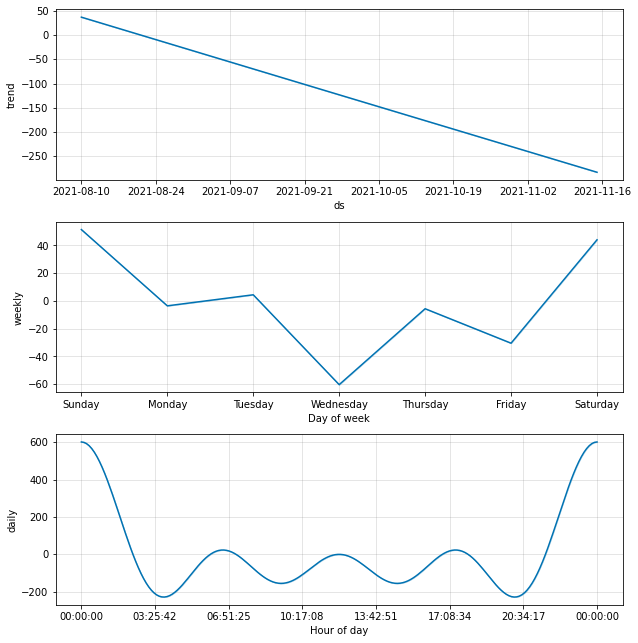

In [66]:
plot2 = p.plot_components(forecast_prediction)

In [67]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [68]:
forecast_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
92,2021-11-11,324.598388,-110.251818,802.738612
93,2021-11-12,296.465366,-144.176369,786.795568
94,2021-11-13,367.643475,-125.032070,814.782219
95,2021-11-14,371.714162,-101.678692,827.470338
96,2021-11-15,313.454839,-129.721402,781.637858


In [69]:
df_merge = pd.merge(warehouse1, forecast_prediction[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-08-10,179.098137,1099.281626,642.663191,455
1,2021-08-11,102.060315,1052.995373,574.612569,553
2,2021-08-12,183.440639,1100.033868,625.982762,569
3,2021-08-13,138.944927,1068.770023,597.840995,426
4,2021-08-14,153.879516,1115.641675,669.010360,536


In [70]:
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)

In [71]:
mae_01

185.89543113264145

In [72]:
mape_01

2.7707450817566643

# Warehoues EW2 Prediction

In [73]:
warehouse2.head()

,warehouse,date,total_orders
90,EW2,2021-09-15,186
91,EW2,2021-09-16,199
92,EW2,2021-09-17,326
93,EW2,2021-09-18,390
94,EW2,2021-09-19,353


In [74]:
warehouse2.dtypes

warehouse       object
date            object
total_orders     int64
dtype: object

In [75]:
warehouse2 ['date'] = pd.to_datetime(warehouse2 ['date'])
warehouse2.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  """Entry point for launching an IPython kernel.


warehouse               object
date            datetime64[ns]
total_orders             int64
dtype: object

In [76]:
warehouse2.drop('warehouse', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  errors=errors,


In [77]:
warehouse2.columns = ['ds', 'y']
warehouse2.head()

,ds,y
90,2021-09-15,186
91,2021-09-16,199
92,2021-09-17,326
93,2021-09-18,390
94,2021-09-19,353


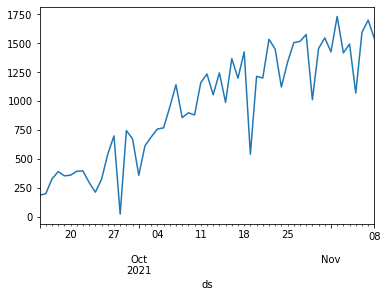

In [78]:
warehouse2.set_index('ds').y.plot()

In [79]:
p = Prophet(interval_width=0.92, daily_seasonality=True)

In [80]:
model = p.fit(warehouse2)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [81]:
future = p.make_future_dataframe(periods=7, freq='D')
future

,ds
0,2021-09-15
1,2021-09-16
2,2021-09-17
3,2021-09-18
4,2021-09-19
...,...
57,2021-11-11
58,2021-11-12
59,2021-11-13
60,2021-11-14


In [82]:
forecast_prediction = p.predict(future)
forecast_prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-15,13.189328,-49.865818,585.935428,13.189328,13.189328,256.791749,256.791749,256.791749,211.19654,211.19654,211.19654,45.595209,45.595209,45.595209,0.0,0.0,0.0,269.981077
1,2021-09-16,40.232451,-23.559244,638.320776,40.232451,40.232451,272.726498,272.726498,272.726498,211.19654,211.19654,211.19654,61.529958,61.529958,61.529958,0.0,0.0,0.0,312.958949
2,2021-09-17,67.275575,-194.075078,461.112326,67.275575,67.275575,63.783203,63.783203,63.783203,211.19654,211.19654,211.19654,-147.413336,-147.413336,-147.413336,0.0,0.0,0.0,131.058778
3,2021-09-18,94.318698,29.791661,698.464537,94.318698,94.318698,252.588415,252.588415,252.588415,211.19654,211.19654,211.19654,41.391875,41.391875,41.391875,0.0,0.0,0.0,346.907113
4,2021-09-19,121.361822,6.303873,674.836881,121.361822,121.361822,217.638092,217.638092,217.638092,211.19654,211.19654,211.19654,6.441552,6.441552,6.441552,0.0,0.0,0.0,338.999913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,2021-11-11,1554.189524,1512.466291,2145.564814,1554.185915,1554.192587,272.726498,272.726498,272.726498,211.19654,211.19654,211.19654,61.529958,61.529958,61.529958,0.0,0.0,0.0,1826.916022
58,2021-11-12,1581.215812,1287.309183,1947.503102,1581.210318,1581.220549,63.783203,63.783203,63.783203,211.19654,211.19654,211.19654,-147.413336,-147.413336,-147.413336,0.0,0.0,0.0,1644.999015
59,2021-11-13,1608.242100,1530.489550,2182.979411,1608.234256,1608.248562,252.588415,252.588415,252.588415,211.19654,211.19654,211.19654,41.391875,41.391875,41.391875,0.0,0.0,0.0,1860.830515
60,2021-11-14,1635.268388,1528.392271,2180.755546,1635.258554,1635.276823,217.638092,217.638092,217.638092,211.19654,211.19654,211.19654,6.441552,6.441552,6.441552,0.0,0.0,0.0,1852.906480


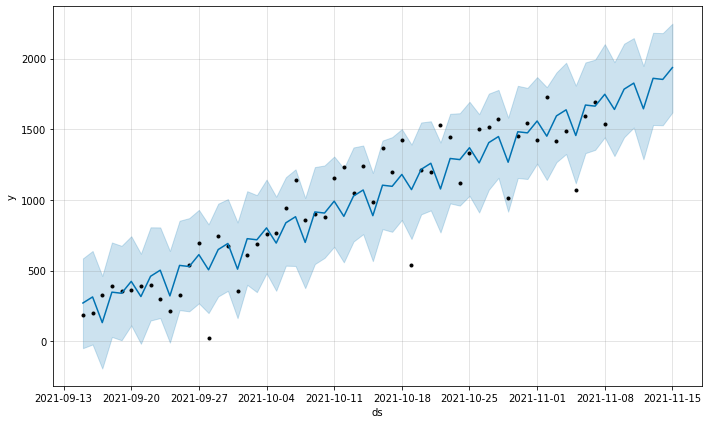

In [83]:
plot1 = p.plot(forecast_prediction)


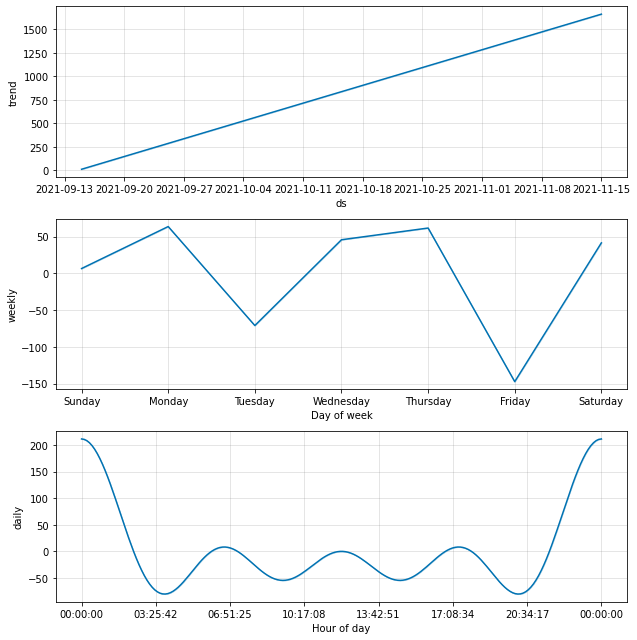

In [84]:
plot2 = p.plot_components(forecast_prediction)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [86]:
forecast_prediction[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
57,2021-11-11,1826.916022,1512.466291,2145.564814
58,2021-11-12,1644.999015,1287.309183,1947.503102
59,2021-11-13,1860.830515,1530.489550,2182.979411
60,2021-11-14,1852.906480,1528.392271,2180.755546
61,2021-11-15,1937.029614,1619.516287,2247.864106


In [87]:
df_merge = pd.merge(warehouse2, forecast_prediction[['ds','yhat_lower','yhat_upper','yhat']],on='ds')
df_merge = df_merge[['ds','yhat_lower','yhat_upper','yhat','y']]
df_merge.head()

,ds,yhat_lower,yhat_upper,yhat,y
0,2021-09-15,-49.865818,585.935428,269.981077,186
1,2021-09-16,-23.559244,638.320776,312.958949,199
2,2021-09-17,-194.075078,461.112326,131.058778,326
3,2021-09-18,29.791661,698.464537,346.907113,390
4,2021-09-19,6.303873,674.836881,338.999913,353


# Calculate MAE between observed and predicted values 

In [88]:
y_true = df_merge['y'].values
y_pred = df_merge['yhat'].values
mae_01 = mean_absolute_error(y_true, y_pred)
mape_01 = mean_absolute_percentage_error(y_true, y_pred)

In [89]:
mae_01

144.69761131315093

In [91]:
mape_01

0.5681905734847954